In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [3]:
sns.set()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('dataset_final_lp.csv', names=['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed', 'applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status'])
dft = pd.read_csv('test_final_lp.csv', names=['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed', 'applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status'])
df = df.append(dft)

In [6]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y


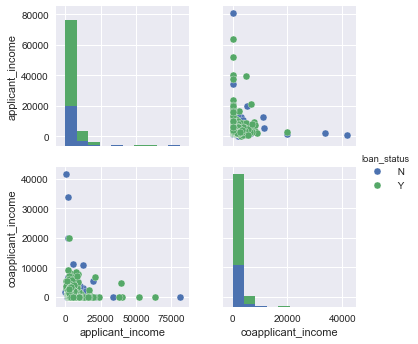

In [7]:
sns.pairplot(df, hue="loan_status")

In [8]:
df.describe()

,applicant_income,coapplicant_income
count,613.000000,613.000000
mean,5402.732463,1623.890571
std,6114.004114,2927.903583
min,150.000000,0.000000
25%,2876.000000,0.000000
50%,3812.000000,1210.000000
75%,5780.000000,2302.000000
max,81000.000000,41667.000000


In [9]:
for x in df.columns:
    print(x)
    print(df[x].value_counts())

loan_id
LP001482    1
LP002624    1
LP001465    1
LP001577    1
LP002031    1
LP001565    1
LP002180    1
LP002459    1
LP001925    1
LP001112    1
LP001199    1
LP002368    1
LP001516    1
LP001041    1
LP002603    1
LP002606    1
LP002484    1
LP002940    1
LP001114    1
LP002161    1
LP002424    1
LP002288    1
LP002517    1
LP001813    1
LP002301    1
LP001664    1
LP002224    1
LP002863    1
LP001014    1
LP001562    1
           ..
LP001256    1
LP001401    1
LP001814    1
LP001528    1
LP002357    1
LP001634    1
LP002943    1
LP001543    1
LP001030    1
LP002767    1
LP002705    1
LP001100    1
LP002223    1
LP002964    1
LP001439    1
LP002659    1
LP002087    1
LP001384    1
LP002571    1
LP001633    1
LP001136    1
LP002386    1
LP001819    1
LP002137    1
LP002949    1
LP001935    1
LP001546    1
LP002519    1
LP001106    1
LP001643    1
Name: loan_id, Length: 613, dtype: int64
gender
 Male      488
 Female    112
            13
Name: gender, dtype: int64
married
 Yes    39

In [10]:
df.corr()

,applicant_income,coapplicant_income
applicant_income,1.000000,-0.116568
coapplicant_income,-0.116568,1.000000


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
education_lb = LabelEncoder()

In [13]:
df['e_education'] = education_lb.fit_transform(df['education'])
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status,e_education
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y,0
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y,0
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y,0


In [14]:
married_lb = LabelEncoder()
df['e_married'] = married_lb.fit_transform(df['married'])
df.head()
df['e_married'].value_counts()

2    398
1    212
0      3
Name: e_married, dtype: int64

In [15]:
df.married.value_counts()

 Yes    398
 No     212
          3
Name: married, dtype: int64

In [16]:
gender_lb = LabelEncoder()
df['e_gender'] = married_lb.fit_transform(df['gender'])

In [17]:
dependents_lb = LabelEncoder()
df['e_dependents'] = dependents_lb.fit_transform(df['dependents'])

In [18]:
self_employed_lb = LabelEncoder()
df['e_self_employed'] = self_employed_lb.fit_transform(df['self_employed'])

In [19]:
df['credit_history'].replace(1, ' 1', inplace=True)
df['credit_history'].replace(0, ' 0', inplace=True)
df['credit_history'].value_counts()

 1    474
 0     89
       50
Name: credit_history, dtype: int64

In [20]:
credit_history_lb = LabelEncoder()
df['e_credit_history'] = credit_history_lb.fit_transform(df['credit_history'])

In [21]:
credit_history_lb = LabelEncoder()
df['e_property_area'] = credit_history_lb.fit_transform(df['property_area'])

In [22]:
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicant_income', 'coapplicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history', 'property_area',
       'loan_status', 'e_education', 'e_married', 'e_gender', 'e_dependents',
       'e_self_employed', 'e_credit_history', 'e_property_area'],
      dtype='object')

In [23]:
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicant_income', 'coapplicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history', 'property_area',
       'loan_status', 'e_education', 'e_married', 'e_gender', 'e_dependents',
       'e_self_employed', 'e_credit_history', 'e_property_area'],
      dtype='object')

In [24]:
#test_df = pd.read_csv('test_final_lp.csv', names=['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed', 'applicant_income', 'coapplicant_income', 'loan_amount', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status'])
df['is_loan_amount_null'] = (df['loan_amount'] == ' ').astype(int)
df['loan_amount'].replace(' ', '0', inplace=True)
df['loan_amount'] = df['loan_amount'].astype(int)
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,...,property_area,loan_status,e_education,e_married,e_gender,e_dependents,e_self_employed,e_credit_history,e_property_area,is_loan_amount_null
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,...,Rural,N,0,2,2,2,1,2,0,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,...,Urban,Y,0,2,2,1,2,2,2,0
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,...,Urban,Y,1,2,2,1,1,2,2,0
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,...,Urban,Y,0,1,2,1,1,2,2,0
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,...,Urban,Y,0,2,2,3,2,2,2,0


In [25]:
df['is_loan_amount_term_null'] = (df['loan_amount_term'] == ' ').astype(int)
df['loan_amount_term'].replace(' ', 0, inplace=True)
df['loan_amount_term'] = df['loan_amount_term'].astype(int)
df
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,...,loan_status,e_education,e_married,e_gender,e_dependents,e_self_employed,e_credit_history,e_property_area,is_loan_amount_null,is_loan_amount_term_null
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,...,N,0,2,2,2,1,2,0,0,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,...,Y,0,2,2,1,2,2,2,0,0
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,...,Y,1,2,2,1,1,2,2,0,0
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,...,Y,0,1,2,1,1,2,2,0,0
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,...,Y,0,2,2,3,2,2,2,0,0


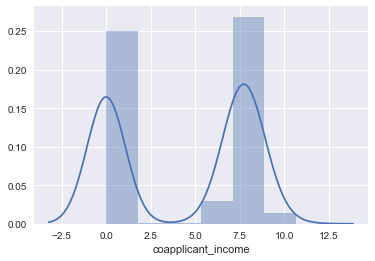

In [26]:

sns.distplot(np.log1p(df['coapplicant_income']))



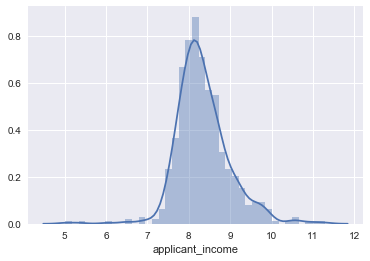

In [27]:

sns.distplot(np.log1p(df['applicant_income']))



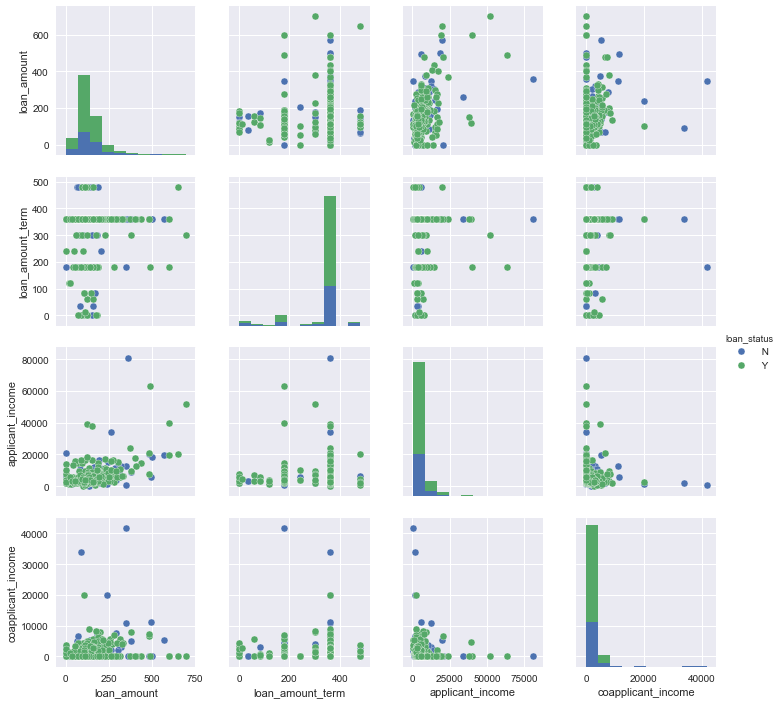

In [28]:
sns.pairplot(df, vars=["loan_amount", "loan_amount_term", "applicant_income", "coapplicant_income"], hue="loan_status")

In [29]:
df['applicant_income'] = np.log1p(df['applicant_income'])
df['coapplicant_income'] = np.log1p(df['coapplicant_income'])

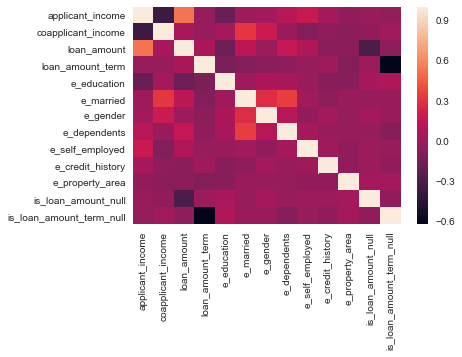

In [30]:
sns.heatmap(df.corr())

In [31]:
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicant_income', 'coapplicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history', 'property_area',
       'loan_status', 'e_education', 'e_married', 'e_gender', 'e_dependents',
       'e_self_employed', 'e_credit_history', 'e_property_area',
       'is_loan_amount_null', 'is_loan_amount_term_null'],
      dtype='object')

new_df = df.drop(columns = ['loan_id', "gender", 'married', 'dependents', 'education', 'self_employed', 'credit_history', 'property_area','loan_status'])
new_df.head()
df['loan_status'].value_counts()
new_df.columns

In [32]:
new_df = df.drop(columns = ['loan_id', "gender", 'married', 'dependents', 'education', 'self_employed', 'credit_history', 'property_area','loan_status', 'is_loan_amount_null', 'is_loan_amount_term_null']) 

In [33]:
new_df.head()
df['loan_status'].value_counts()
new_df.columns

Index(['applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'e_education', 'e_married', 'e_gender',
       'e_dependents', 'e_self_employed', 'e_credit_history',
       'e_property_area'],
      dtype='object')

In [157]:
model = XGBClassifier(max_depth=5, objective = 'binary:logistic', 
                      n_estimators=99, learning_rate=0.1,
                      reg_lambda=1,silent=False,
                     scale_pos_weight=0.45, gamma=1.5, min_child_weight=5, subsample=0.6, colsample_bytree=0.4)

{'colsample_bytree': 1.0,
 'gamma': 5,
 'max_depth': 5,
 'min_child_weight': 10,
 'scale_pos_weight': 0.45,
 'subsample': 0.8}

{'colsample_bytree': 1.0,
 'gamma': 5,
 'max_depth': 5,
 'min_child_weight': 10,
 'scale_pos_weight': 0.45,
 'subsample': 0.8}

In [115]:
ls

dataset_final_lp.csv               s.csv           svm.csv
first_solution_sumedh-Copy1.ipynb  submission.csv  test_final_lp.csv
first_solution_sumedh.ipynb        submission.ods


In [118]:
new_df['loan_amount_term'] = np.log1p(new_df['loan_amount_term'])

In [119]:
new_df['loan_amount'] = np.log1p(new_df['loan_amount'])

In [112]:
train_x = new_df[:600]
test_x = new_df[600:]
train_y = df['loan_status'][:600]

In [151]:
##train_x = train_x.drop(columns=['e_dependents'])
train_x['applicant_income_2'] = train_x['applicant_income'] **2
train_x['new_feat'] = train_x['applicant_income'] * train_x['coapplicant_income']

In [38]:
loan_status_lb = LabelEncoder()
df['loan_status'][:600] = loan_status_lb.fit_transform(df['loan_status'][:600])
train_y = df['loan_status'][:600] 

/home/sumedh/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
train_y.value_counts()

1    410
0    190
Name: loan_status, dtype: int64

In [152]:
model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=5, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=5, missing=None, n_estimators=99,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=0.45, seed=None,
       silent=False, subsample=0.8)

In [139]:
y = model.predict(test_x)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=object)

In [42]:
y.shape

(13,)

In [73]:
final = pd.DataFrame({"ExpectedValue": y, "Index":range(1, 14)})

In [74]:
final

,ExpectedValue,Index
0,1,1
1,0,2
2,1,3
3,1,4
4,0,5
5,1,6
6,1,7
7,0,8
8,1,9
9,1,10


In [76]:
final.to_csv('s.csv')

In [68]:
predicted  = model.predict(train_x)

In [87]:
x_train, x_eval, y_train, y_eval = train_test_split(train_x, train_y, test_size=0.1, random_state=42, shuffle=True)

In [158]:
model.fit(x_train, y_train, eval_set= [(x_train, y_train)], verbose=True)

[0]	validation_0-error:0.387037
[1]	validation_0-error:0.42037
[2]	validation_0-error:0.255556
[3]	validation_0-error:0.27037
[4]	validation_0-error:0.281481
[5]	validation_0-error:0.294444
[6]	validation_0-error:0.25
[7]	validation_0-error:0.253704
[8]	validation_0-error:0.25
[9]	validation_0-error:0.259259
[10]	validation_0-error:0.274074
[11]	validation_0-error:0.240741
[12]	validation_0-error:0.259259
[13]	validation_0-error:0.246296
[14]	validation_0-error:0.248148
[15]	validation_0-error:0.248148
[16]	validation_0-error:0.246296
[17]	validation_0-error:0.255556
[18]	validation_0-error:0.248148
[19]	validation_0-error:0.25
[20]	validation_0-error:0.240741
[21]	validation_0-error:0.237037
[22]	validation_0-error:0.238889
[23]	validation_0-error:0.235185
[24]	validation_0-error:0.233333
[25]	validation_0-error:0.231481
[26]	validation_0-error:0.225926
[27]	validation_0-error:0.224074
[28]	validation_0-error:0.227778
[29]	validation_0-error:0.22963
[30]	validation_0-error:0.222222
[3

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=1.5, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=5, missing=None,
       n_estimators=99, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=0.45, seed=None, silent=False,
       subsample=0.6)

In [159]:
model.fit(x_train, y_train, eval_set= [(x_eval, y_eval)], verbose=True)

[0]	validation_0-error:0.433333
[1]	validation_0-error:0.466667
[2]	validation_0-error:0.233333
[3]	validation_0-error:0.25
[4]	validation_0-error:0.233333
[5]	validation_0-error:0.366667
[6]	validation_0-error:0.216667
[7]	validation_0-error:0.233333
[8]	validation_0-error:0.283333
[9]	validation_0-error:0.25
[10]	validation_0-error:0.283333
[11]	validation_0-error:0.233333
[12]	validation_0-error:0.25
[13]	validation_0-error:0.25
[14]	validation_0-error:0.266667
[15]	validation_0-error:0.266667
[16]	validation_0-error:0.266667
[17]	validation_0-error:0.3
[18]	validation_0-error:0.3
[19]	validation_0-error:0.266667
[20]	validation_0-error:0.25
[21]	validation_0-error:0.266667
[22]	validation_0-error:0.25
[23]	validation_0-error:0.25
[24]	validation_0-error:0.25
[25]	validation_0-error:0.283333
[26]	validation_0-error:0.25
[27]	validation_0-error:0.266667
[28]	validation_0-error:0.283333
[29]	validation_0-error:0.25
[30]	validation_0-error:0.233333
[31]	validation_0-error:0.266667
[32]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=1.5, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=5, missing=None,
       n_estimators=99, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=0.45, seed=None, silent=False,
       subsample=0.6)

In [155]:
model.predict(test_x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=object)

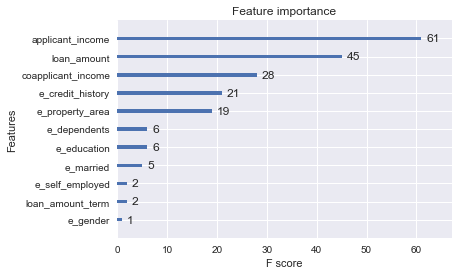

In [160]:
import xgboost
xgboost.plot_importance(model)

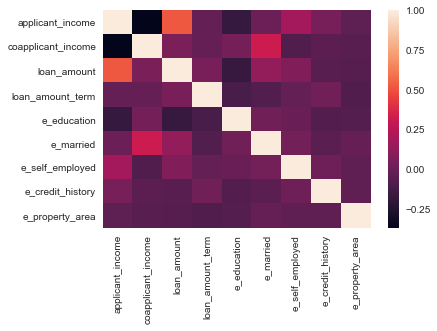

In [148]:
sns.heatmap(train_x.corr())

In [114]:
x_train.describe()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,e_education,e_married,e_gender,e_dependents,e_self_employed,e_credit_history,e_property_area
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,8.311885,4.377053,140.479630,334.000000,0.229630,1.638889,1.774074,1.733333,1.074074,1.685185,1.031481
std,0.640776,3.867322,87.459238,83.431952,0.420985,0.492209,0.468759,1.033394,0.419906,0.618937,0.792433
min,5.017280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.926512,0.000000,99.000000,360.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
50%,8.222284,7.133693,125.000000,360.000000,0.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000
75%,8.643032,7.746291,160.000000,360.000000,0.000000,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000
max,11.302217,10.637489,700.000000,480.000000,1.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000


In [49]:
x_train.columns

Index(['applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'e_education', 'e_married', 'e_gender',
       'e_dependents', 'e_self_employed', 'e_credit_history',
       'e_property_area'],
      dtype='object')

In [79]:
predicted = model.predict(x_eval)
(predicted == y_eval).value_counts()

True     47
False    13
Name: loan_status, dtype: int64

In [80]:
predicted = model.predict(x_train)
(predicted == y_train).value_counts()

True     459
False     81
Name: loan_status, dtype: int64

In [ ]:
train_x.shape

In [ ]:
y_train.shape

In [52]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        }

In [ ]:
train_y = train_y.values

In [54]:
 from sklearn import svm

In [55]:
model_2 = svm.SVC(verbose=True, class_weight='balanced', C=1)

In [ ]:
ls

In [56]:
model_2.fit(x_train, y_train.astype(int))

[LibSVM]

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [57]:
(model_2.predict(x_train) == y_train).value_counts()

True     492
False     48
Name: loan_status, dtype: int64

In [58]:
(model_2.predict(x_eval) == y_eval).value_counts()

True     31
False    29
Name: loan_status, dtype: int64

In [60]:
model_2.predict(test_x)

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
final = pd.DataFrame({"Expected": model_2.predict(test_x), "Id":range(1, 14)})

In [64]:
final.to_csv('svm.csv')

In [ ]:
model_2.predict(x_train)

In [101]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

search = GridSearchCV(model, param_grid=params, cv=skf.split(train_x,train_y.astype(int)), verbose=3)

# Here we go # timing starts from this point for "start_time" variable
search.fit(train_x, train_y.astype(int))


Fitting 5 folds for each of 1215 candidates, totalling 6075 fits
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.775, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.7083333333333334, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_po

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.7166666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.8333333333333334, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.675, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5,

[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.75, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.675, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.825, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6

[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.6833333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.775, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5,

[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.65, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.7333333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsamp

[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.7, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.7166666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, c

[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.775, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.7166666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.7833333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.6583333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5,

[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.7333333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.6833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.75, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gam

[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.6666666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.8333333333333334, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.75, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.675, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsa

[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.7333333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.8083333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.675, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytr

[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.7166666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.6833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.65, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, 

[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.8333333333333334, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.75, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.675, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.6, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsa

[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.7, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.8, max_

[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.6833333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.8166666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.7416666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=

[CV]  subsample=1.0, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.6833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.8333333333333334, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.7583333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.6583333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, co

[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.6583333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.6666666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.825, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsamp

[CV]  subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.675, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.775, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.7083333333333334, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.6, 

[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.6583333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.775, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytre

[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.7833333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.6916666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.7583333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.7, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_by

[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.6583333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.6583333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.825, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsamp

[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.775, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.7666666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.7333333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  su

[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.6833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.8333333333333334, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.7333333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.675, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytre

[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.6833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.7583333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.6583333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.7833333333333333, total=   0.1s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gam

[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.6583333333333333, total=   0.1s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.825, total=   0.1s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.6, score=0.7333333333333333, total=   0.1s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsamp

[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.8083333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.6666666666666666, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.8333333333333334, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.7583333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.4

[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.7166666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.65, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.8166666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytre

[CV]  subsample=0.6, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.65, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsamp

[CV]  subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.7666666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.7583333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.825, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.675, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_by

[CV]  subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.825, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.6833333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.8416666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.7583333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5,

[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.7583333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.725, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.675, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV] 

[CV]  subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.75, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.6833333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.8083333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.7, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsamp

[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.7, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.8166666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, c

[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.7583333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.7416666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.7833333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, scor

[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.6916666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.65, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsamp

[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.75, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.6833333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.8083333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.6, score=0.7, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_

[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.6916666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.775, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  su

[CV]  subsample=1.0, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.75, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.6833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.825, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.6, m

[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.6583333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.6833333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample

[CV]  subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.6833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.8166666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.7416666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.6916666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, co

[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.7083333333333334, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.65, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.8083333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree

[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.7416666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.8166666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.6916666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.75, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_byt

[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.6583333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.675, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 


[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.7, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.75, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  sub

[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.6916666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.6583333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.8416666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=

[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.7416666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.7, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.825, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.6, score=0.6833333333333333, total=   0.0s


[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7583333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.825, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.8166666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytre

[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.775, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.85, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  s

[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.8333333333333334, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7583333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.8416666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, co

[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.8166666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7333333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.8333333333333334, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7666666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gam

[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.75, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7583333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.8333333333333334, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree

[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.8333333333333334, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.775, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7583333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.8416666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytre

[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7666666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.8333333333333334, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.775, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytre

[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7416666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.725, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.725, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsamp

[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.775, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  su

[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.8333333333333334, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.775, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.85, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  s

[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.725, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.8333333333333334, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.775, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsamp

[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7666666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7583333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.85, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.6, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsamp

[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.7083333333333334, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree

[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.675, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.8166666666666667, total=   0.2s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.7166666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5,

[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.7416666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.6833333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.65, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gam

[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.7083333333333334, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.675, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5,

[CV]  subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.7166666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, c

[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.775, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.7083333333333334, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.775, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.6666666666666666, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_by

[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.675, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, ga

[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.725, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.6833333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.8083333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5,

[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.7166666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.775, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.65, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.825, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]

[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.825, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.7166666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.783333333

[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.675, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.7416666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.65, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=0.8, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsa

[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.8166666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.7666666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.75, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.8083333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree

[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.6583333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.825, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.7583333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.7083333333333334, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytre

[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.675, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.7166666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  su

[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.675, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.825, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.7583333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.6833333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8

[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.775, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.775, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.7, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.6, 

[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.7083333333333334, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.675, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  su

[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.675, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.75, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.725, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample

[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.725, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.6833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.75, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.65, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsamp

[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.775, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.7166666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  su

[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.7666666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.7333333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=

[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.675, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.75, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.725, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth

[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.65, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.6666666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8, score=0.8166666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=0.8 
[

[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.6666666666666666, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, c

[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.7666666666666667, total=   0.1s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.7083333333333334, total=   0.1s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.7916666666666666, total=   0.1s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.6583333333333333, total=   0.1s
[CV] subsample=1.0, max_depth=3, min_child_weight=5, scale_pos_weight=0.4

[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.7833333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.7416666666666667, total=   0.1s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.6833333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.8166666666666667, total=   0.1s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_we

[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.6916666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.6916666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.4

[CV]  subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.775, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.6916666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5,

[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.775, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.75, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.75, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.8083333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV] 

[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.65, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.675, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8

[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.675, total=   0.1s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.8083333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.775, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV] 

[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.7083333333333334, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.7666666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.6583333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, c

[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.6833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, c

[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.7416666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.65, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=0.8, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsamp

[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.6833333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.7583333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=

[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.825, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.625, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.825, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.775, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=3

[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.7083333333333334, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.8333333333333334, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.775, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  su

[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.6583333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.7833333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.7416666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample

[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.7583333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.6916666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=

[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.725, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.6416666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.8083333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytre

[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.8333333333333334, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.6833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.75, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.725, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[C

[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.6833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.65, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsampl

[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.7583333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.7166666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=

[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.775, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.725, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.8083333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.7166666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  

[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.6833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.65, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsampl

[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.6833333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.6666666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=0.8, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gam

[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.775, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.85, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.6, m

[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.8333333333333334, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.75, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.775, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  s

[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.7583333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.85, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsampl

[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.7333333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.725, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  s

[CV]  subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.825, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.75, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.8583333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  s

[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.775, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.85, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  s

[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.7416666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.7416666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.7166666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample

[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.8333333333333334, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, co

[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.8416666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.75, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.8333333333333334, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.775, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  s

[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.775, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.85, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  s

[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.725, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.825, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=0.8 
[CV]  subsamp

[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.725, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.8166666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.691666666

[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.825, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.775, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.725, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV

[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.7583333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.7083333333333334, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.6833333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.4

[CV]  subsample=0.6, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.6666666666666666, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.775, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.75, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.6666666666666666, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsa

[CV]  subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.8, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.7583333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.725, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.7583333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytr

[CV]  subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.8166666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.75, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.7166666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, 

[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.775, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.75, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.725, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]

[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.675, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.8166666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.75, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.6916666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsa

[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.6666666666666666, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.8, total=   0.1s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.8083333333333333, total=   0.1s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.75, total=   0.1s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=0.5, colsample_bytre

[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.6916666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.8166666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.675, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5,

[CV]  subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.725, total=   0.1s
[CV] subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.6833333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=0.5,

[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.75, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.6916666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.8083333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=0.5, colsample_bytree=1.0, score=0.6583333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gam

[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.7, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.6916666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=

[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.7416666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.825, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.675, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.8083333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  

[CV]  subsample=1.0, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.6666666666666666, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.725, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.675, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 

[CV]  subsample=0.6, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.6666666666666666, total=   0.1s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.8166666666666667, total=   0.1s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.75, total=   0.1s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.6833333333333333, total=   0.1s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsampl

[CV]  subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.675, total=   0.1s
[CV] subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.7833333333333333, total=   0.1s
[CV] subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.7666666666666667, total=   0.1s
[CV] subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.7, total=   0.1s
[CV] subsample=1.0, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  su

[CV]  subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.7583333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.7083333333333334, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.6583333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1, co

[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.75, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.6833333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.6916666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsampl

[CV]  subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.7166666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.675, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.8, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.7, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=

[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.6416666666666667, total=   0.1s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.8, total=   0.1s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.7916666666666666, total=   0.1s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.7083333333333334, total=   0.1s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1, colsample_bytree=

[CV]  subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.7666666666666667, total=   0.1s
[CV] subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.7416666666666667, total=   0.1s
[CV] subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.725, total=   0.1s
[CV] subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.7916666666666666, total=   0.1s
[CV] subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1, colsample_bytre

[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.6916666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.8166666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.7166666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.675, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsamp

[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.8, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1, colsample_bytree=1.0, score=0.6666666666666666, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.825, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subs

[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.7083333333333334, total=   0.1s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.7833333333333333, total=   0.1s
[CV] subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.6583333333333333, total=   0.1s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.7916666666666666, total=   0.1s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.4

[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.775, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.7166666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.8166666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.6583333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5,

[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.775, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.6833333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.725, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, cols

[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.7083333333333334, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.8, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.675, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[C

[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.7333333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.675, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.8, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  s

[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.7166666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.6916666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.8166666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.4

[CV]  subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.6833333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.8166666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.7333333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.6833333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_we

[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.8083333333333333, total=   0.1s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.7833333333333333, total=   0.1s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.6916666666666667, total=   0.1s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.8083333333333333, total=   0.1s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.4

[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.7833333333333333, total=   0.1s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.7333333333333333, total=   0.1s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.8, total=   0.1s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.6666666666666666, total=   0.1s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=1.5, c

[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.8, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.7083333333333334, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.8, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=1.5, colsample_bytree

[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.7083333333333334, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.6916666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=1.5, colsample_bytree=1.0, score=0.6583333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_we

[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.725, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.6916666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.8083333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytre

[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7416666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.8583333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.675, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.8333333333333334, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytre

[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.6583333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.8166666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.775, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytre

[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.675, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7333333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.725, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0

[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.775, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  su

[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.825, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.775, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.725, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.8166666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.8

[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.775, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7333333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.8, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=1.0, ma

[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7166666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.6916666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.75, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.65, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 


[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.6666666666666666, total=   0.1s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7916666666666666, total=   0.1s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7333333333333333, total=   0.1s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=2, co

[CV]  subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.8166666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.6583333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7333333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, co

[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7166666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_by

[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.7166666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.6916666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.75, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0, score=0.65, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=2, colsample_bytree=1.0 


[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.75, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.8333333333333334, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7583333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.8333333333333334, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree

[CV] subsample=1.0, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7333333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=3, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.75, total=  

[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7333333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.8166666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7333333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.8333

[CV]  subsample=0.8, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7333333333333333, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.8333333333333334, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7666666666666667, total=   0.0s
[CV] subsample=1.0, max_depth=3, min_child_weight=10, scale_pos_weight=0.45, gam

[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.775, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7583333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.825, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7583333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  

[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7666666666666667, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.85, total=   0.0s
[CV] subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.725, total=   0.0s
[CV] subsample=1.0, max_depth=4, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  s

[CV]  subsample=1.0, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.75, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.725, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7083333333333334, total=   0.0s
[CV] subsample=0.6, max_depth=4, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 

[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.825, total=   0.1s
[CV] subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7583333333333333, total=   0.1s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.8083333333333333, total=   0.1s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7833333333333333, total=   0.1s
[CV] subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytre

[CV]  subsample=0.8, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.775, total=   0.1s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.8333333333333334, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7916666666666666, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.775, total=   0.0s
[CV] subsample=1.0, max_depth=5, min_child_weight=1, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  

[CV]  subsample=1.0, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7833333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7416666666666667, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.75, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=5, scale_pos_weight=0.45, gamma=5, colsample_bytree

[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7083333333333334, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.7916666666666666, total=   0.0s
[CV] subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.725, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsample_bytree=1.0, score=0.8083333333333333, total=   0.0s
[CV] subsample=0.8, max_depth=5, min_child_weight=10, scale_pos_weight=0.45, gamma=5, colsamp

[Parallel(n_jobs=1)]: Done 6075 out of 6075 | elapsed:  3.9min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f643c0c5d00>,
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=1.5, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=5, missing=0,
       n_estimators=99, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=2, scale_pos_weight=0.45, seed=None, silent=False,
       subsample=0.6),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'subsample': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5], 'min_child_weight': [1, 5, 10], 'scale_pos_weight': [0.45, 0.45, 0.45], 'gamma': [0.5, 1, 1.5, 2, 5], 'colsample_bytree': [0.6, 0.8, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [102]:
random_search.best_params_

{'colsample_bytree': 1.0,
 'gamma': 5,
 'max_depth': 5,
 'min_child_weight': 10,
 'scale_pos_weight': 0.45,
 'subsample': 0.8}

In [99]:
random_search.cv_results_

/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:1

{'mean_fit_time': array([ 0.06099539,  0.04533253,  0.05055561,  0.03845396,  0.04450555]),
 'mean_score_time': array([ 0.00235877,  0.00164223,  0.00148325,  0.00147877,  0.00165353]),
 'mean_test_score': array([ 0.74666667,  0.74333333,  0.77166667,  0.75666667,  0.75666667]),
 'mean_train_score': array([ 0.86708333,  0.82708333,  0.7775    ,  0.8275    ,  0.84708333]),
 'param_colsample_bytree': masked_array(data = [1.0 1.0 1.0 0.6 0.6],
              mask = [False False False False False],
        fill_value = ?),
 'param_gamma': masked_array(data = [0.5 1 5 2 1.5],
              mask = [False False False False False],
        fill_value = ?),
 'param_max_depth': masked_array(data = [5 3 5 4 5],
              mask = [False False False False False],
        fill_value = ?),
 'param_min_child_weight': masked_array(data = [5 5 10 5 5],
              mask = [False False False False False],
        fill_value = ?),
 'param_scale_pos_weight': masked_array(data = [0.45 0.45 0.45 0.45 0.45